In [2]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# Next, we'll load the Iris flower dataset, which is in the "../input/" directory
iris = pd.read_csv("/content/Iris.csv") # the iris dataset is now a Pandas DataFrame

# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do
iris.head()

# Press shift+enter to execute this cell

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Let's see how many examples we have of each species
iris["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

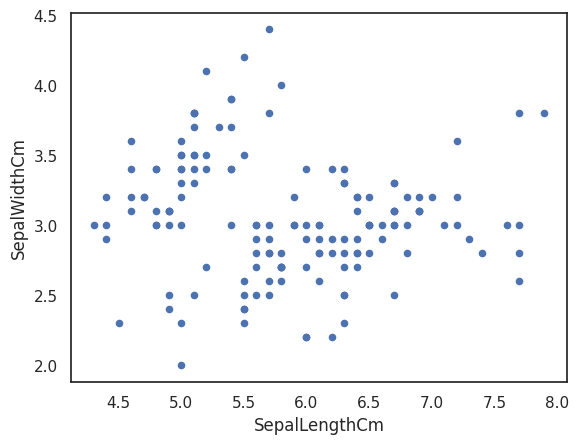

In [4]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")


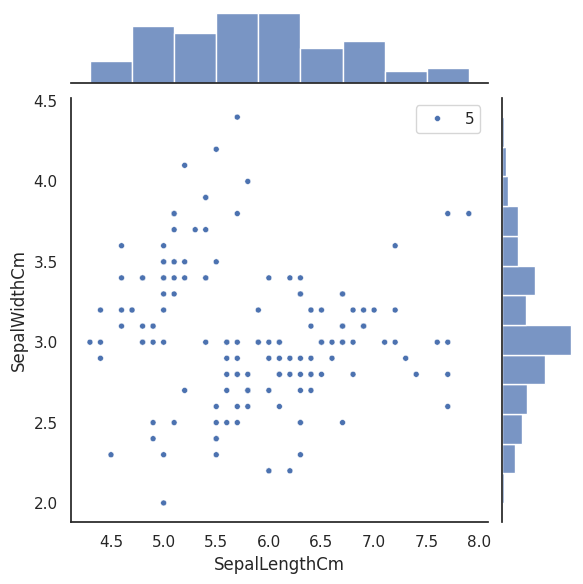

In [5]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)

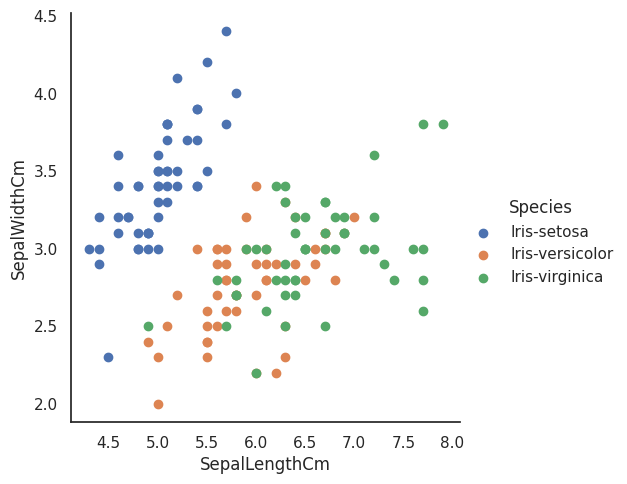

In [8]:
g = sns.FacetGrid(iris, hue="Species", height=5)
g.map_dataframe(plt.scatter, "SepalLengthCm", "SepalWidthCm")
g.add_legend()

# Show the plot
plt.show()

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

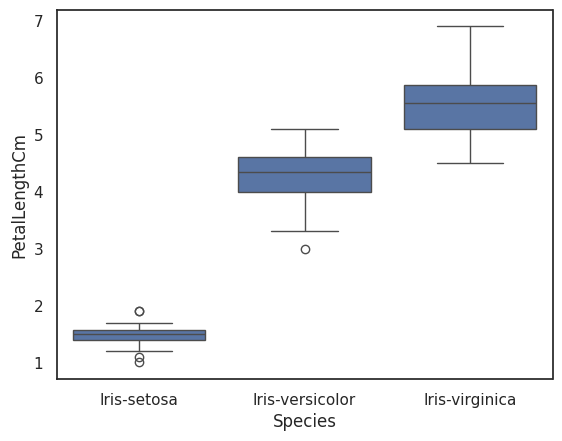

In [9]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

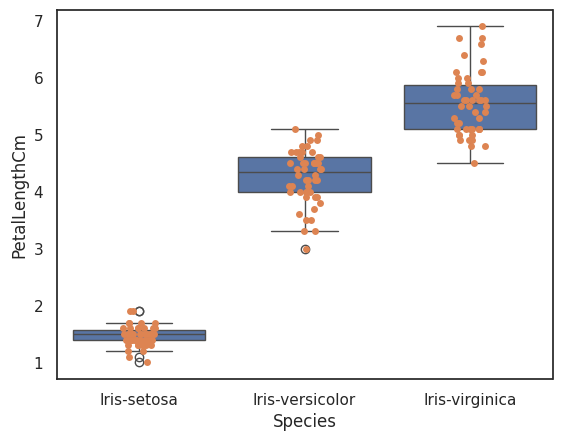

In [10]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
#
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

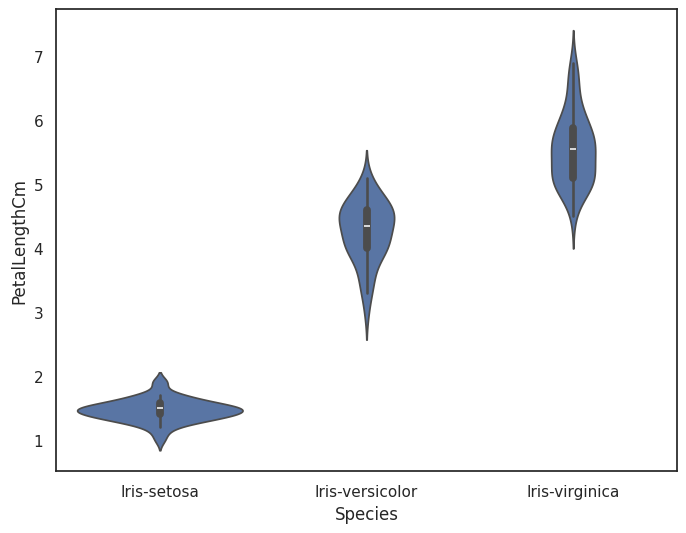

In [13]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot





# Set figure size before plotting
plt.figure(figsize=(8, 6))

# Create a violin plot
sns.violinplot(x="Species", y="PetalLengthCm", data=iris)

# Show the plot
plt.show()


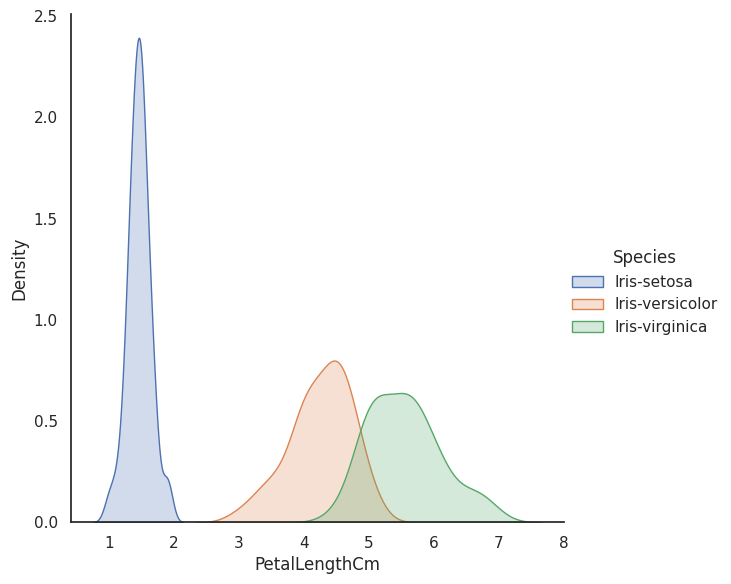

In [17]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
g = sns.FacetGrid(iris, hue="Species", height=6)
g.map(sns.kdeplot, "PetalLengthCm", fill=True)  # `fill=True` for better visualization
g.add_legend()

plt.show()

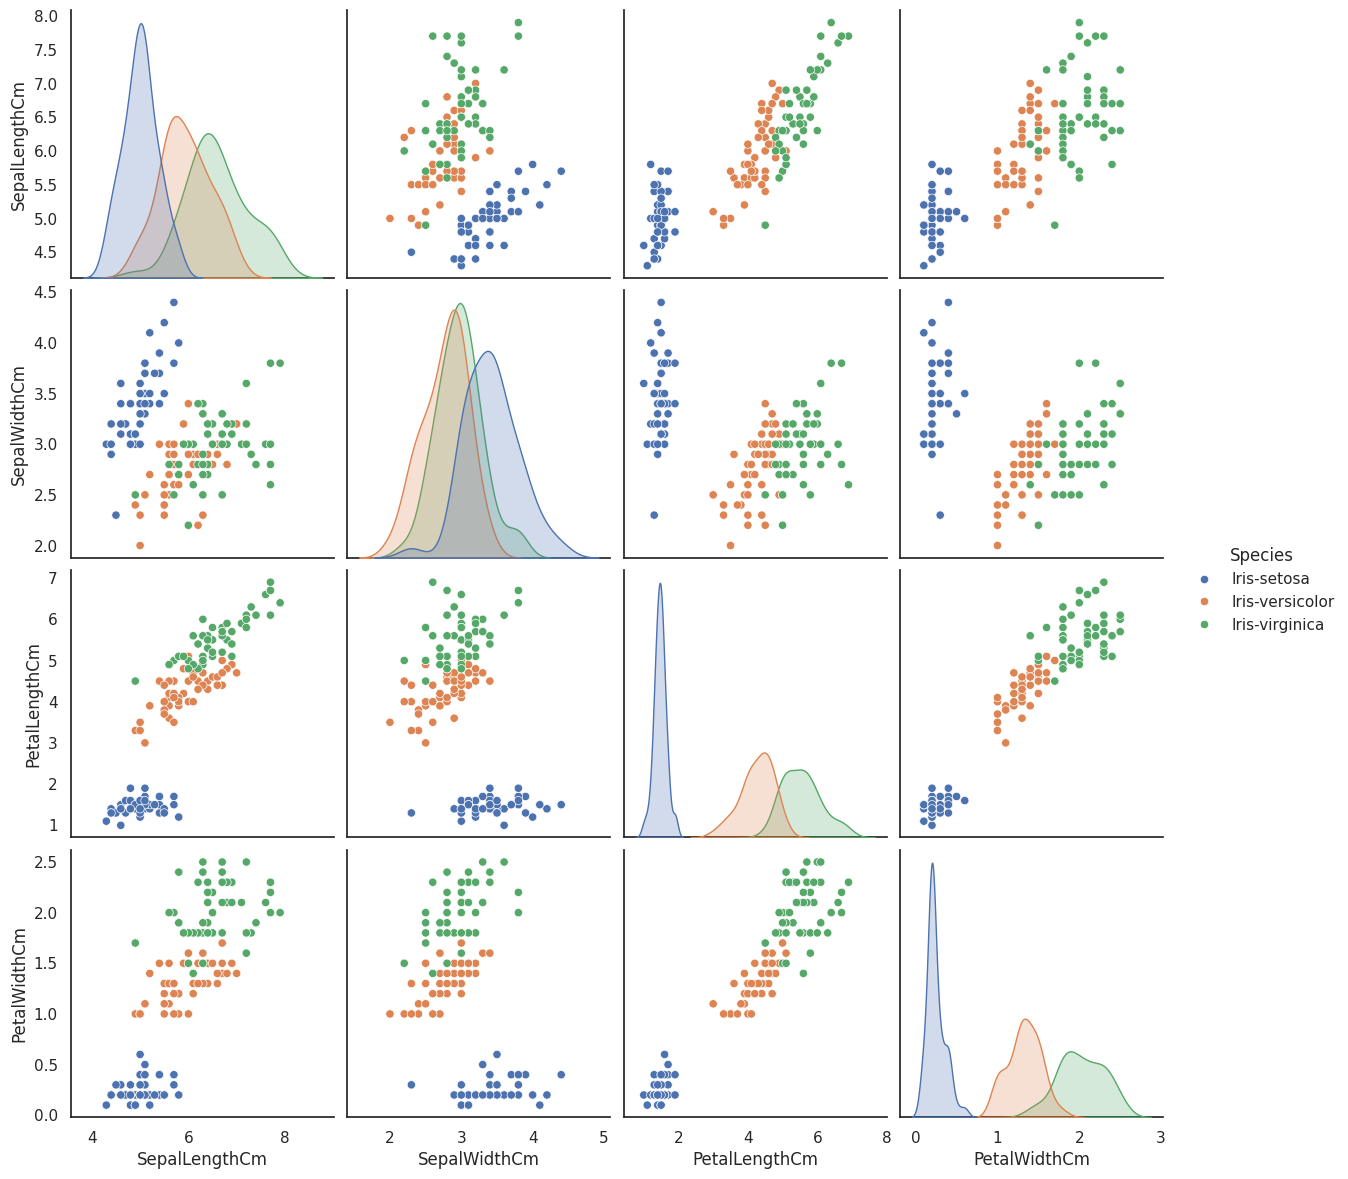

In [18]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
#
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

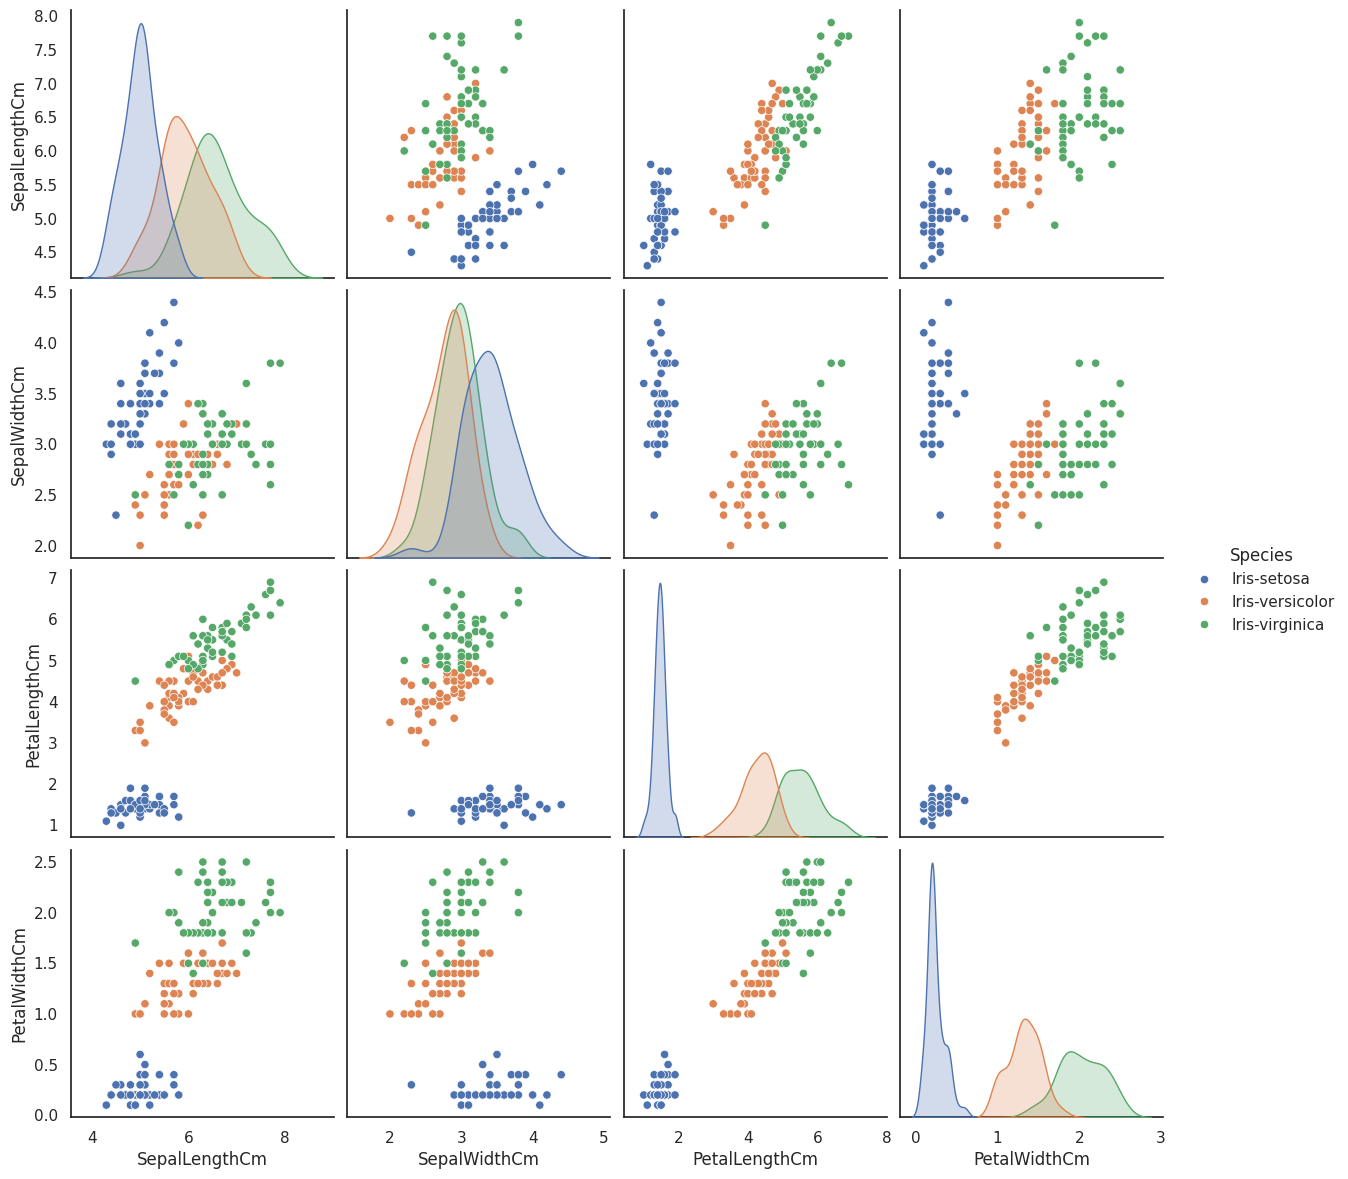

In [20]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

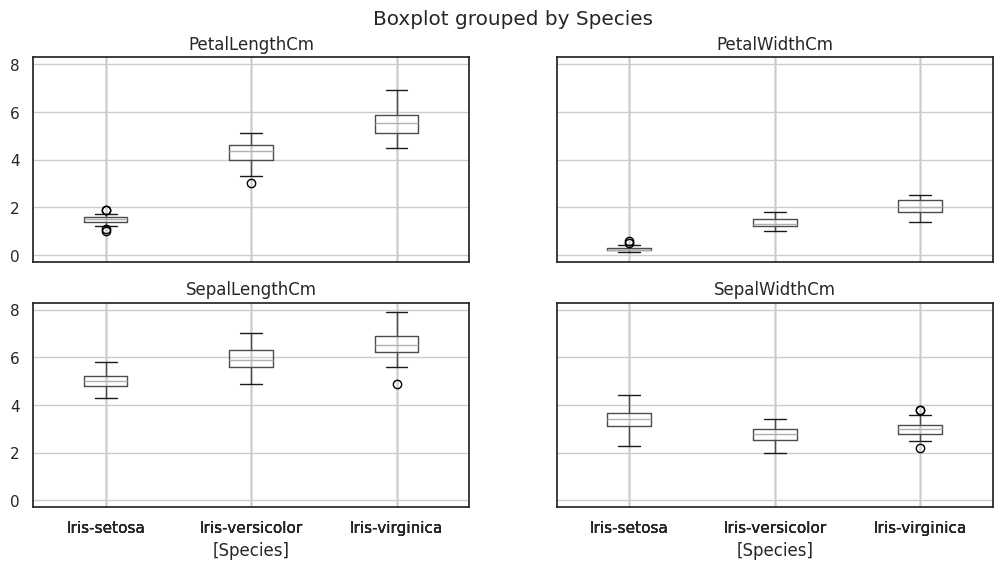

In [21]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
iris.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

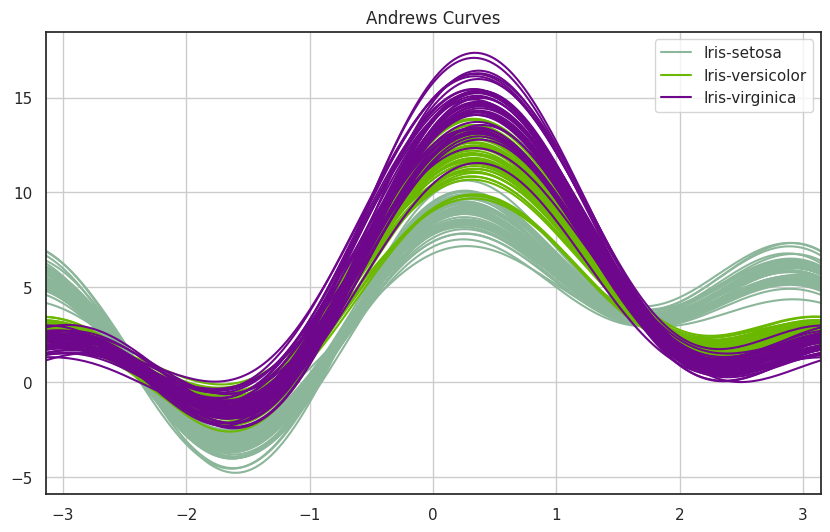

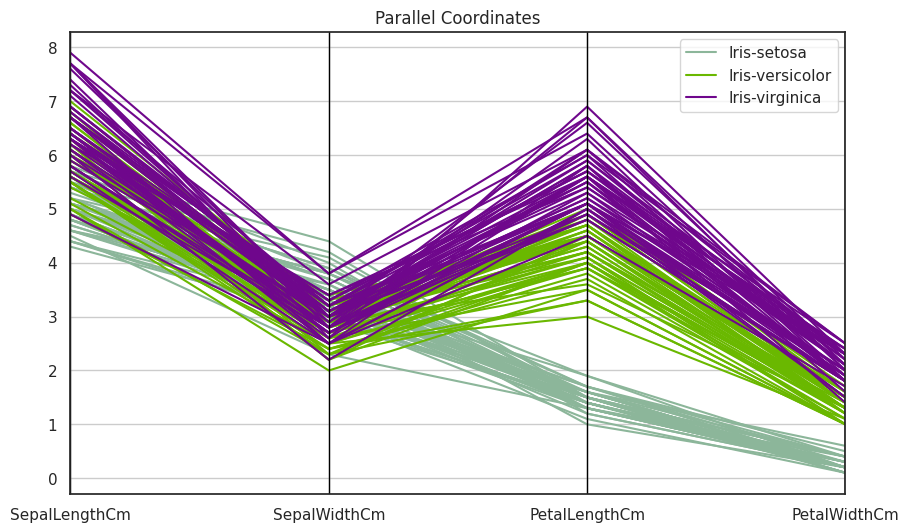

In [30]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import andrews_curves, parallel_coordinates


# Andrews Curves Plot
plt.figure(figsize=(10, 6))
andrews_curves(iris.drop("Id", axis=1), "Species")
plt.title("Andrews Curves")
plt.show()

# Parallel Coordinates Plot
plt.figure(figsize=(10, 6))
parallel_coordinates(iris.drop("Id", axis=1), "Species")
plt.title("Parallel Coordinates")
plt.show()


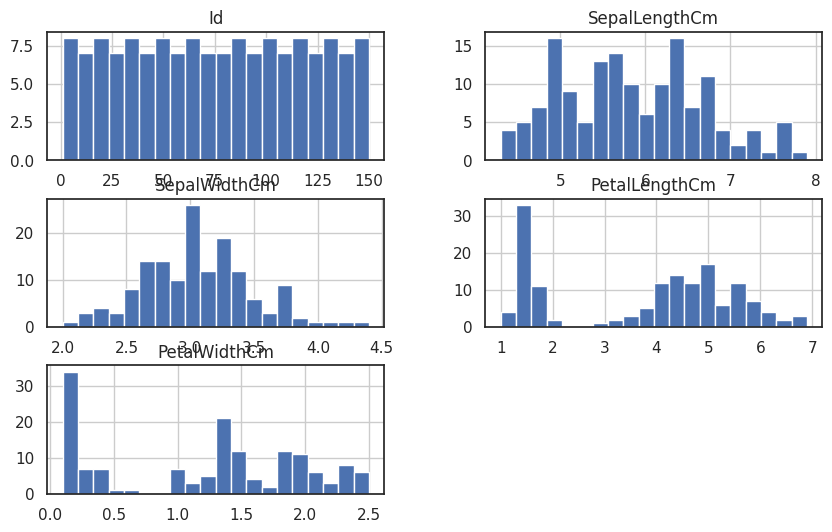

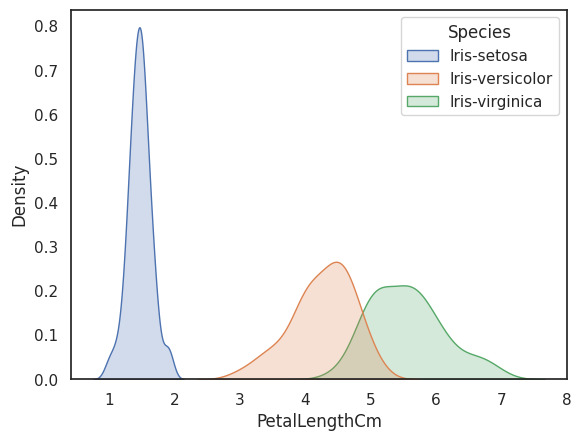

In [31]:
#Univariate Analysis (Distribution of individual features)

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for each numeric feature
iris.hist(figsize=(10,6), bins=20)
plt.show()

# KDE Plot
sns.kdeplot(data=iris, x="PetalLengthCm", hue="Species", fill=True)
plt.show()


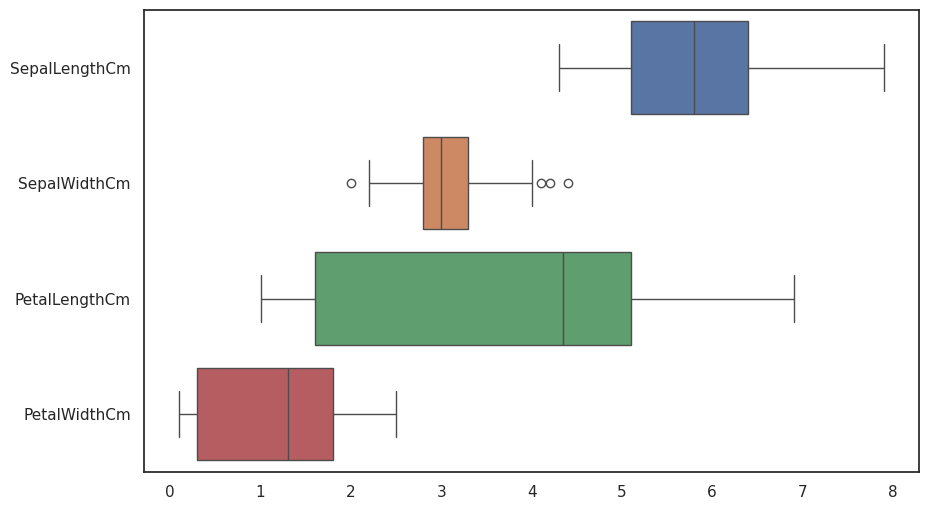

In [32]:
# Boxplot to detect outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=iris.drop(columns=["Id"]), orient="h")
plt.show()


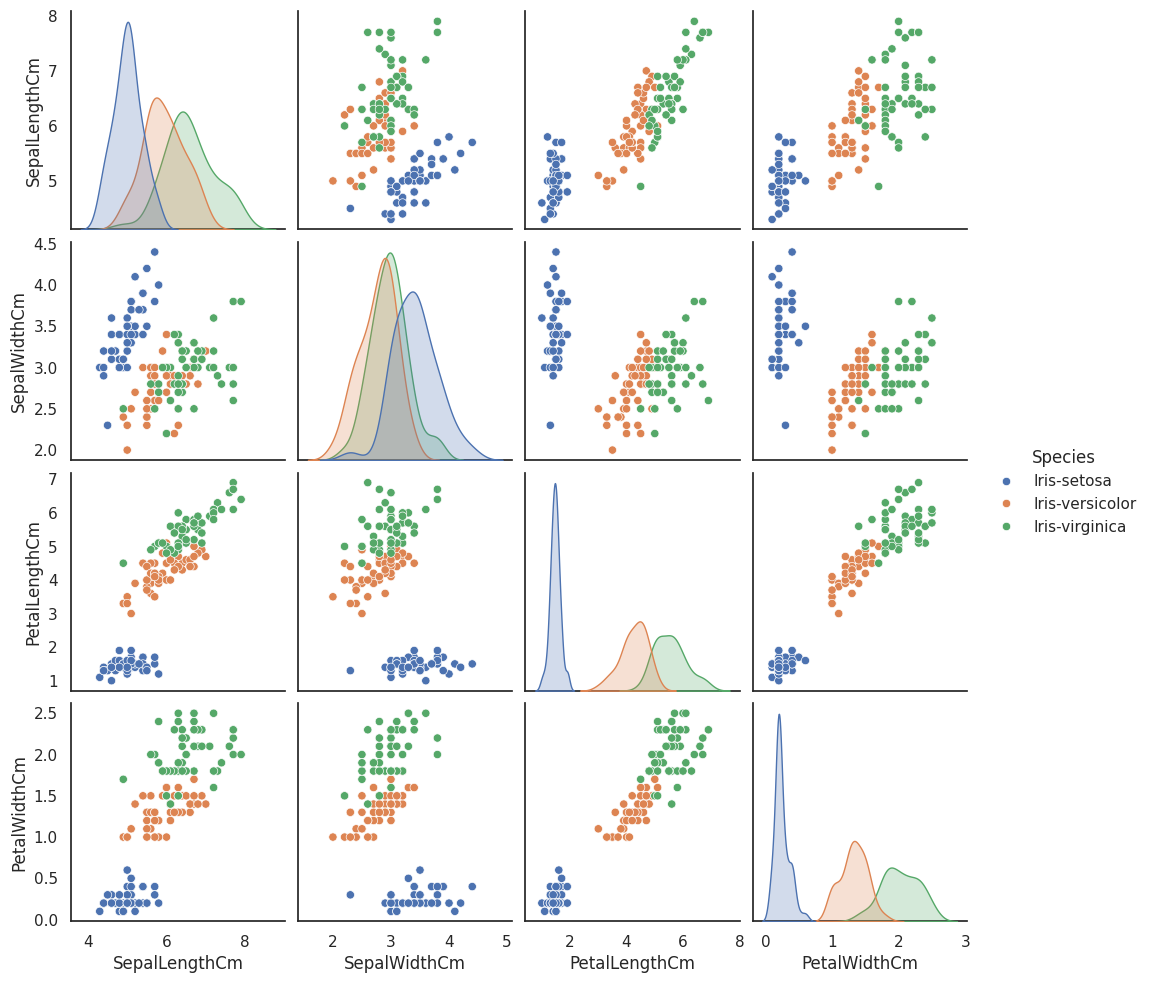

In [33]:
# Pairplot of all features colored by species
sns.pairplot(iris.drop(columns=["Id"]), hue="Species", diag_kind="kde")
plt.show()


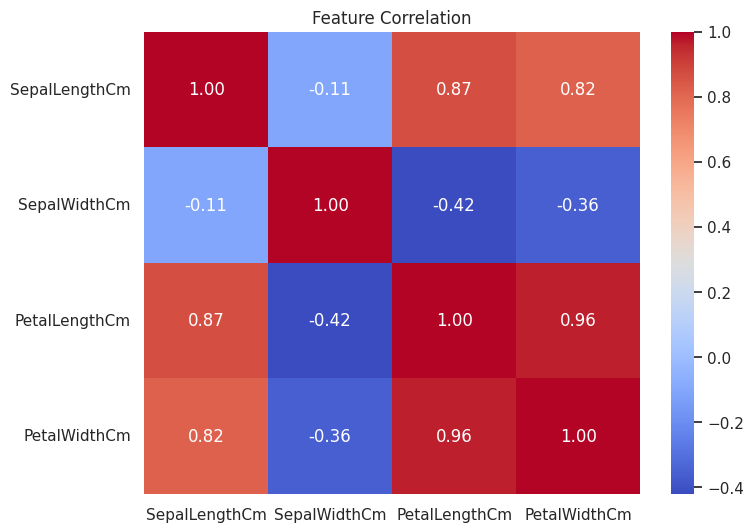

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns
numeric_iris = iris.drop(columns=["Id", "Species"])

# Create the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_iris.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation")
plt.show()


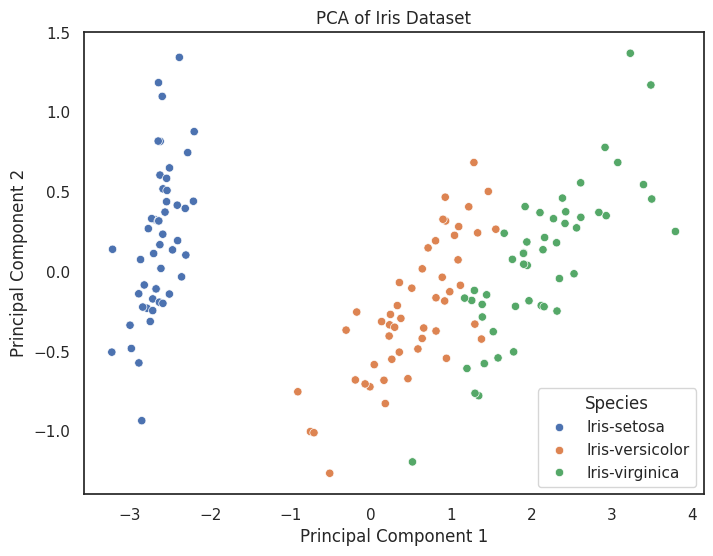

In [36]:
from sklearn.decomposition import PCA

# Standardize the data
X = iris.drop(columns=["Id", "Species"])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=iris["Species"], palette="deep")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Iris Dataset")
plt.show()
